# EDA of transaction and customer data

## Overall

In [43]:
from src.utils.bq import BQ
from google.cloud import bigquery

bq = BQ()

/Users/anthonybeech/python/dsci/ltv/.venv/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [75]:
CUSTOMER_QUERY = """

SELECT customer_id 
FROM `mpb-data-science-dev-ab-602d.dsci_daw.STV` 
GROUP BY customer_id 
ORDER BY count(*) DESC 
LIMIT 1000 OFFSET 10000

"""

customers = bq.to_dataframe(CUSTOMER_QUERY)["customer_id"].tolist()

/Users/anthonybeech/python/dsci/ltv/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [ ]:
TRANSACTION_QUERY = """

SELECT *
FROM `mpb-data-science-dev-ab-602d.dsci_daw.STV` 
WHERE customer_id IN UNNEST(@customer_ids)
ORDER BY customer_id, transaction_completed_datetime

"""


job_config = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ArrayQueryParameter("customer_ids", "INT64", customers)
    ]
)
transactions = bq.to_dataframe(TRANSACTION_QUERY, job_config=job_config)

/Users/anthonybeech/python/dsci/ltv/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [77]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50992 entries, 0 to 50991
Data columns (total 88 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   transaction_id                               50992 non-null  object             
 1   customer_id                                  50992 non-null  Int64              
 2   transaction_type                             50992 non-null  object             
 3   quoted_sell_items                            42608 non-null  Int64              
 4   secured_sell_items                           42608 non-null  Int64              
 5   sold_sell_items                              42608 non-null  Int64              
 6   total_buy_items                              7747 non-null   Int64              
 7   delivery_charge_market                       7747 non-null   float64            
 8   delivery_charge_market_inc

In [78]:
for column in transactions.columns:
    print(f"- {column}: {transactions[column].unique()[:5]}")

- transaction_id: ['1d1cfdb8-84d3-4689-bef9-103a6831e610'
 'dbccd128-e922-4254-8673-9658dd0b5b8d'
 '02217455-2e05-44d3-b374-f15e7044b124'
 '973d3383-efda-434e-8157-70c31467dbf4'
 '7e0a1374-b3fe-4c26-a664-b88aa24dc65c']
- customer_id: <IntegerArray>
[812991, 814314, 817810, 818756, 820041]
Length: 5, dtype: Int64
- transaction_type: ['RETURN' 'SELLING' 'TRADING' 'BUYING' 'PART REFUND']
- quoted_sell_items: <IntegerArray>
[<NA>, 11, 32, 2, 4]
Length: 5, dtype: Int64
- secured_sell_items: <IntegerArray>
[<NA>, 11, 0, 2, 1]
Length: 5, dtype: Int64
- sold_sell_items: <IntegerArray>
[<NA>, 0, 2, 1, 3]
Length: 5, dtype: Int64
- total_buy_items: <IntegerArray>
[<NA>, 2, 5, 1, 3]
Length: 5, dtype: Int64
- delivery_charge_market: [   nan   0.    -8.95  -5.95 -16.95]
- delivery_charge_market_inc_vat_salestax: [   nan   0.    -8.95  -5.95 -16.95]
- delivery_charge_market_exc_vat_salestax: [   nan   0.    -7.45  -4.95 -14.12]
- buy_value_market: [   nan -1848.  -345. -3999. -5749.]
- buy_value_mark

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'quoted_sell_items'}>,
        <Axes: title={'center': 'secured_sell_items'}>,
        <Axes: title={'center': 'sold_sell_items'}>,
        <Axes: title={'center': 'total_buy_items'}>,
        <Axes: title={'center': 'delivery_charge_market'}>,
        <Axes: title={'center': 'delivery_charge_market_inc_vat_salestax'}>,
        <Axes: title={'center': 'delivery_charge_market_exc_vat_salestax'}>],
       [<Axes: title={'center': 'buy_value_market'}>,
        <Axes: title={'center': 'buy_value_market_inc_vat_salestax'}>,
        <Axes: title={'center': 'buy_value_market_exc_vat_salestax'}>,
        <Axes: title={'center': 'buy_value_operational'}>,
        <Axes: title={'center': 'gmv'}>,
        <Axes: title={'center': 'total_quoted_sell_value'}>,
        <Axes: title={'center': 'total_secure_sell_value'}>,
        <Axes: title={'center': 'total_sold_sell_value'}>],
       [<Axes: title={'center': 'total_so

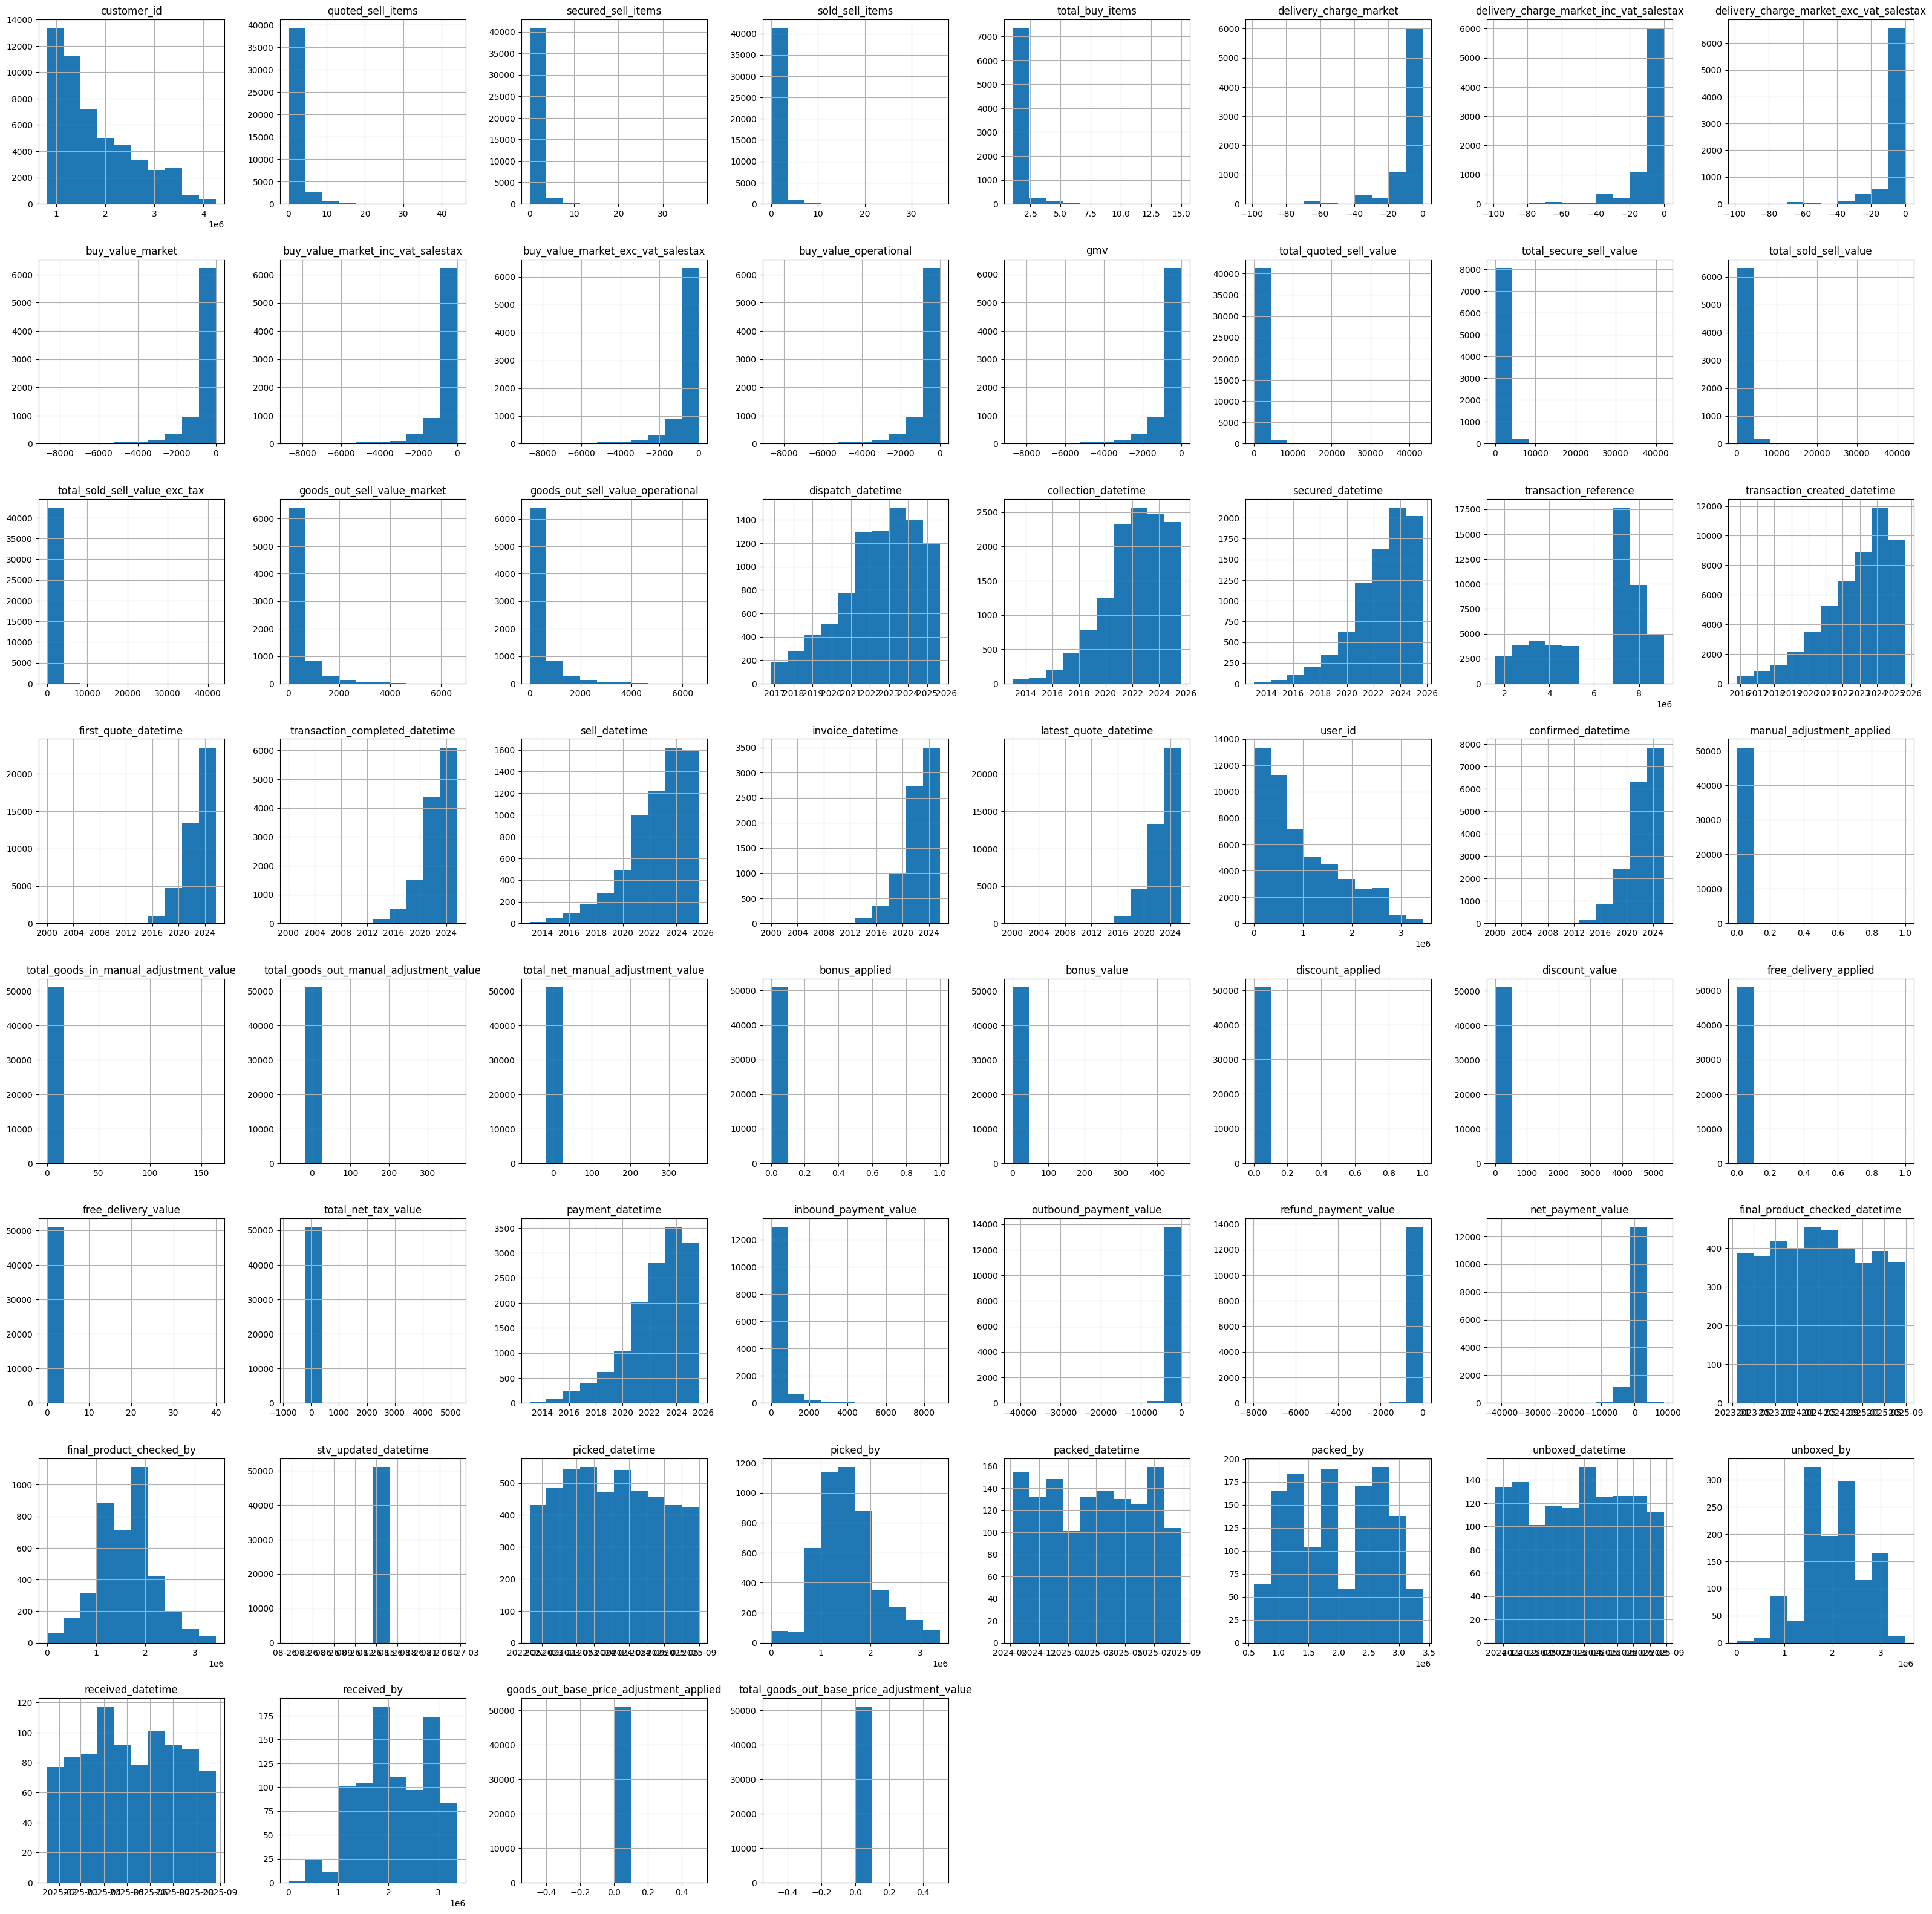

In [79]:
transactions.hist(figsize=(40, 40))

## Agg by customer

In [127]:
TRANSACTION_QUERY = """

SELECT 
customer_id, 
COUNT(*) AS total_transactions
FROM `mpb-data-science-dev-ab-602d.dsci_daw.STV` 
GROUP BY customer_id
ORDER BY total_transactions

"""


job_config = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ArrayQueryParameter("customer_ids", "INT64", customers)
    ]
)
transactions = bq.to_dataframe(TRANSACTION_QUERY, job_config=job_config)

/Users/anthonybeech/python/dsci/ltv/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [128]:
transactions["total_transactions"].value_counts()

total_transactions
1       1607423
2        463202
3        221304
4        133879
5         87602
         ...   
449           1
453           1
458           1
460           1
5904          1
Name: count, Length: 538, dtype: Int64

<Axes: xlabel='total_transactions'>

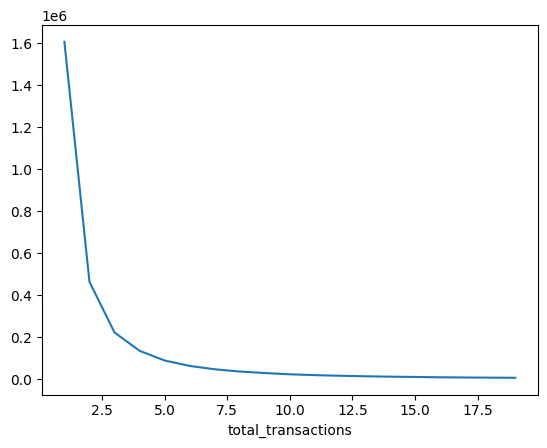

In [129]:
_transactions = transactions[transactions["total_transactions"] < 20]
_transactions["total_transactions"].value_counts().plot()

In [130]:
import numpy as np
transactions["total_transactions"].quantile(np.arange(0, 1.1, 0.1))

0.0       1.0
0.1       1.0
0.2       1.0
0.3       1.0
0.4       1.0
0.5       1.0
0.6       2.0
0.7       2.0
0.8       3.0
0.9       6.0
1.0    5904.0
Name: total_transactions, dtype: Float64

In [124]:
TRANSACTION_QUERY = """

WITH transaction_data AS (
  SELECT
    customer_id,
    COUNT(*) AS total_transactions,
    -- use seconds for precision, then convert to days
    TIMESTAMP_DIFF(MAX(transaction_completed_datetime),
                   MIN(transaction_completed_datetime),
                   SECOND) AS lifetime_seconds
  FROM `mpb-data-science-dev-ab-602d.dsci_daw.STV`
  WHERE transaction_completed_datetime IS NOT NULL
  GROUP BY customer_id
)

SELECT
  customer_id,
  -- average gap in days between transactions based on first & last
  SAFE_DIVIDE(lifetime_seconds, 86400 * (total_transactions - 1)) AS avg_frequency_days
FROM transaction_data
WHERE total_transactions > 1
ORDER BY total_transactions, customer_id

"""

job_config = bigquery.QueryJobConfig(
    query_parameters=[
        bigquery.ArrayQueryParameter("customer_ids", "INT64", customers)
    ]
)
transactions = bq.to_dataframe(TRANSACTION_QUERY, job_config=job_config)

/Users/anthonybeech/python/dsci/ltv/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [126]:
transactions["avg_frequency_days"].quantile(np.arange(0, 1.1, 0.1))

0.0       0.000000
0.1       8.920307
0.2      31.143269
0.3      69.967610
0.4     115.762619
0.5     169.000000
0.6     235.769162
0.7     327.740022
0.8     462.586192
0.9     742.000653
1.0    5066.000000
Name: avg_frequency_days, dtype: float64